In [1]:
suppressPackageStartupMessages({
    library(ggplot2)
    library(scales)
    library(tidyverse)
})

In [2]:
# dir.create("cellphonedb/visualisation")
setwd("cellphonedb/")

## E9.5
### Mean expression values

In [3]:
sign.means.e9.5 <- read.delim(file = "out9.5/significant_means.txt", header = TRUE)

Remove unwanted rows and columns:

In [4]:
# rows
sign.means.e9.5 <- sign.means.e9.5[grep("BMP[2467]", x = sign.means.e9.5$interacting_pair),] 

to.discard <- grep("PTPRK|SMO|SLAMF1", sign.means.e9.5$interacting_pair)
sign.means.e9.5 <- sign.means.e9.5[-to.discard,]

In [5]:
#columns
sign.means.e9.5 <- sign.means.e9.5[,c(1:12, grep("Apical.ectodermal.ridge", x = colnames(sign.means.e9.5)))] 

to.discard <- grep("Branchial|Myocytes|Cardiomyocytes|Endothelial|Osteo|Stroma|Vascular", colnames(sign.means.e9.5))
sign.means.e9.5 <- sign.means.e9.5[, -to.discard]

In [6]:
tail(colnames(sign.means.e9.5),1)

[1] "Myotome.Apical.ectodermal.ridge"

In [7]:
df.mean <- sign.means.e9.5  %>% 
            gather(interactors, mean, "Apical.ectodermal.ridge.Apical.ectodermal.ridge":"Myotome.Apical.ectodermal.ridge")

Set NA means to 0

In [8]:
df.mean$mean[is.na(df.mean$mean)] <- 0

### P-values for expression data

In [9]:
pvalues.e9.5 <- read.delim(file = "out9.5/pvalues.txt", header = TRUE)

Remove unwanted rows and columns:

In [10]:
# rows
pvalues.e9.5 <- pvalues.e9.5[grep("BMP[2467]", x = pvalues.e9.5$interacting_pair),]

to.discard <- grep("PTPRK|SMO|SLAMF1", pvalues.e9.5$interacting_pair)
pvalues.e9.5 <- pvalues.e9.5[-to.discard,]

In [11]:
# columns
pvalues.e9.5 <- pvalues.e9.5[,c(1:11, grep("Apical.ectodermal.ridge", x = colnames(pvalues.e9.5)))] 

to.discard <- grep("Branchial|Myocytes|Cardiomyocytes|Endothelial|Osteo|Stroma|Vascular", colnames(pvalues.e9.5))
pvalues.e9.5 <- pvalues.e9.5[, -to.discard]

In [12]:
df.pvalues <- pvalues.e9.5  %>% 
            gather(interactors, pvalue, "Apical.ectodermal.ridge.Apical.ectodermal.ridge":"Myotome.Apical.ectodermal.ridge")

Set NA pvalues to 1

In [13]:
df.pvalues$pvalue[is.na(df.pvalues$pvalue)] <- 1

Perform a log-transformation on the pvalues (pseudocount 0.0001).

In [14]:
df.pvalues$pvalue <- -log10(df.pvalues$pvalue + 0.0001)

### Couple means to their respective p-values

In [15]:
cols.to.join <- c(head(colnames(pvalues.e9.5), 7), "interactors")

In [16]:
df.mean.pvalues <- full_join(df.mean, df.pvalues, by = cols.to.join)

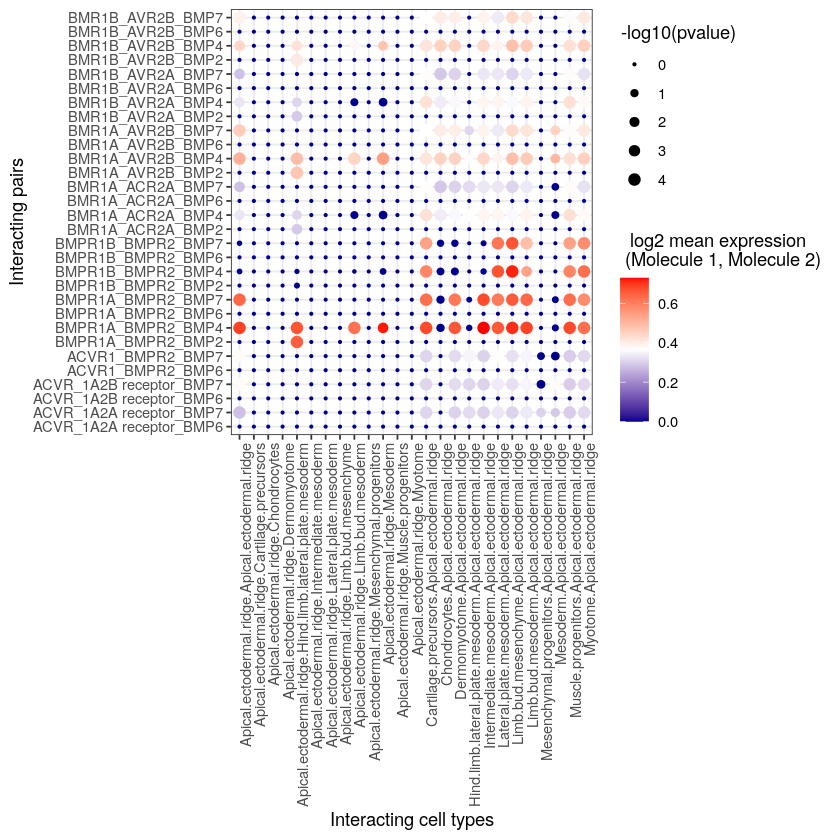

In [17]:
midpoint <- median(range(df.mean.pvalues$mean))

plot <- ggplot(df.mean.pvalues, aes(x = interactors, y = interacting_pair)) +
            geom_point(aes(size = pvalue, color = mean)) +
            scale_color_gradient2(low = "darkblue", mid = "white", high = "red", midpoint = midpoint) +
            scale_size(range = c(0.5, 2.85)) +
            theme_bw() + 
            theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
            xlab("Interacting cell types") + ylab("Interacting pairs")

plot <- plot + labs(color = "log2 mean expression \n (Molecule 1, Molecule 2)", size = "-log10(pvalue)")

plot <- plot + theme(legend.title.align = 0.5)

plot

In [18]:
ggsave("visualisation/AER.BMP.e9.5.filtered.dotplot.tiff", width = 9, height = 10)

In [19]:
df.mean.pvalues9 = df.mean.pvalues

## E10.5
### Mean expression values

In [20]:
sign.means.e10.5 <- read.delim(file = "out10.5/significant_means.txt", header = TRUE)

Remove unwanted rows and columns:

In [21]:
# rows
sign.means.e10.5 <- sign.means.e10.5[grep("BMP[2467]", x = sign.means.e10.5$interacting_pair),] 

to.discard <- grep("PTPRK|SMO|SLAMF1", sign.means.e10.5$interacting_pair)
sign.means.e10.5 <- sign.means.e10.5[-to.discard,]

In [22]:
#columns
sign.means.e10.5 <- sign.means.e10.5[,c(1:12, grep("Apical.ectodermal.ridge", x = colnames(sign.means.e10.5)))] 

to.discard <- grep("Branchial|Myocytes|Cardiomyocytes|Endothelial|Osteo|Stroma|Vascular", colnames(sign.means.e10.5))
sign.means.e10.5 <- sign.means.e10.5[, -to.discard]

In [23]:
tail(colnames(sign.means.e10.5),1)

[1] "Perichondrium.Apical.ectodermal.ridge"

In [24]:
df.mean <- sign.means.e10.5  %>% 
            gather(interactors, mean, "Apical.ectodermal.ridge.Apical.ectodermal.ridge":"Perichondrium.Apical.ectodermal.ridge")

Set NA means to 0

In [25]:
df.mean$mean[is.na(df.mean$mean)] <- 0

### P-values for expression data

In [26]:
pvalues.e10.5 <- read.delim(file = "out10.5/pvalues.txt", header = TRUE)

Remove unwanted rows and columns:

In [27]:
# rows
pvalues.e10.5 <- pvalues.e10.5[grep("BMP[2467]", x = pvalues.e10.5$interacting_pair),]

to.discard <- grep("PTPRK|SMO|SLAMF1", pvalues.e10.5$interacting_pair)
pvalues.e10.5 <- pvalues.e10.5[-to.discard,]

In [28]:
# columns
pvalues.e10.5 <- pvalues.e10.5[,c(1:11, grep("Apical.ectodermal.ridge", x = colnames(pvalues.e10.5)))] 

to.discard <- grep("Branchial|Myocytes|Cardiomyocytes|Endothelial|Osteo|Stroma|Vascular", colnames(pvalues.e10.5))
pvalues.e10.5 <- pvalues.e10.5[, -to.discard]

In [29]:
df.pvalues <- pvalues.e10.5  %>% 
            gather(interactors, pvalue, "Apical.ectodermal.ridge.Apical.ectodermal.ridge":"Perichondrium.Apical.ectodermal.ridge")

Set NA pvalues to 1

In [30]:
df.pvalues$pvalue[is.na(df.pvalues$pvalue)] <- 1

Perform a log-transformation on the pvalues (pseudocount 0.0001).

In [31]:
df.pvalues$pvalue <- -log10(df.pvalues$pvalue + 0.0001)

### Couple means to their respective p-values

In [32]:
cols.to.join <- c(head(colnames(pvalues.e10.5), 7), "interactors")

In [33]:
df.mean.pvalues <- full_join(df.mean, df.pvalues, by = cols.to.join)

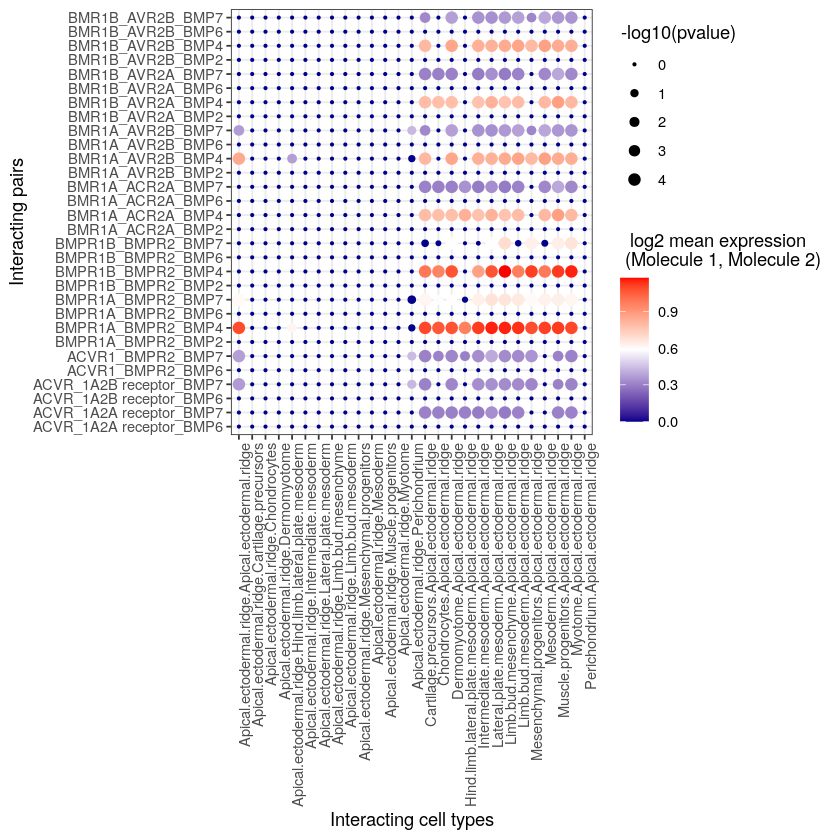

In [34]:
midpoint <- median(range(df.mean.pvalues$mean))

plot <- ggplot(df.mean.pvalues, aes(x = interactors, y = interacting_pair)) +
            geom_point(aes(size = pvalue, color = mean)) +
            scale_color_gradient2(low = "darkblue", mid = "white", high = "red", midpoint = midpoint) +
            scale_size(range = c(0.5, 2.85)) +
            theme_bw() + 
            theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
            xlab("Interacting cell types") + ylab("Interacting pairs")

plot <- plot + labs(color = "log2 mean expression \n (Molecule 1, Molecule 2)", size = "-log10(pvalue)")

plot <- plot + theme(legend.title.align = 0.5)

plot

In [35]:
ggsave("visualisation/AER.BMP.e10.5.filtered.dotplot.tiff", width = 10, height = 10)

In [36]:
df.mean.pvalues10 = df.mean.pvalues

## E11.5
### Mean expression values

In [37]:
sign.means.e11.5 <- read.delim(file = "out11.5/significant_means.txt", header = TRUE)

Remove unwanted rows and columns:

In [38]:
# rows
sign.means.e11.5 <- sign.means.e11.5[grep("BMP[2467]", x = sign.means.e11.5$interacting_pair),] 

to.discard <- grep("PTPRK|SMO|SLAMF1", sign.means.e11.5$interacting_pair)
sign.means.e11.5 <- sign.means.e11.5[-to.discard,]

In [39]:
#columns
sign.means.e11.5 <- sign.means.e11.5[,c(1:12, grep("Apical.ectodermal.ridge", x = colnames(sign.means.e11.5)))] 

to.discard <- grep("Branchial|Cardiomyocytes|Stroma|Vascular", colnames(sign.means.e11.5))
sign.means.e11.5 <- sign.means.e11.5[, -to.discard]

In [40]:
tail(colnames(sign.means.e11.5),1)

[1] "Periosteum.Apical.ectodermal.ridge"

In [41]:
df.mean <- sign.means.e11.5  %>% 
            gather(interactors, mean, "Apical.ectodermal.ridge.Apical.ectodermal.ridge":"Periosteum.Apical.ectodermal.ridge")

Set NA means to 0

In [42]:
df.mean$mean[is.na(df.mean$mean)] <- 0

### P-values for expression data

In [43]:
pvalues.e11.5 <- read.delim(file = "out11.5/pvalues.txt", header = TRUE)

Remove unwanted rows and columns:

In [44]:
# rows
pvalues.e11.5 <- pvalues.e11.5[grep("BMP[2467]", x = pvalues.e11.5$interacting_pair),]

to.discard <- grep("PTPRK|SMO|SLAMF1", pvalues.e11.5$interacting_pair)
pvalues.e11.5 <- pvalues.e11.5[-to.discard,]

In [45]:
# columns
pvalues.e11.5 <- pvalues.e11.5[,c(1:11, grep("Apical.ectodermal.ridge", x = colnames(pvalues.e11.5)))] 

to.discard <- grep("Branchial|Cardiomyocytes|Stroma|Vascular", colnames(pvalues.e11.5))
pvalues.e11.5 <- pvalues.e11.5[, -to.discard]

In [46]:
df.pvalues <- pvalues.e11.5  %>% 
            gather(interactors, pvalue, "Apical.ectodermal.ridge.Apical.ectodermal.ridge":"Periosteum.Apical.ectodermal.ridge")

Set NA pvalues to 1

In [47]:
df.pvalues$pvalue[is.na(df.pvalues$pvalue)] <- 1

Perform a log-transformation on the pvalues (pseudocount 0.0001).

In [48]:
df.pvalues$pvalue <- -log10(df.pvalues$pvalue + 0.0001)

### Couple means to their respective p-values

In [49]:
cols.to.join <- c(head(colnames(pvalues.e11.5), 7), "interactors")

In [50]:
df.mean.pvalues <- full_join(df.mean, df.pvalues, by = cols.to.join)

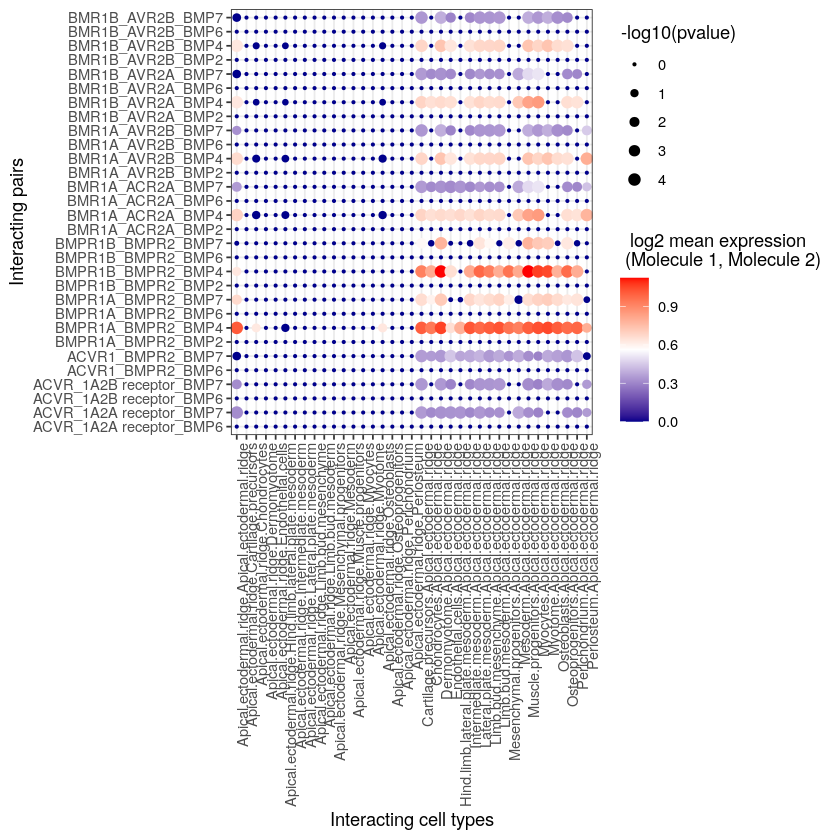

In [51]:
midpoint <- median(range(df.mean.pvalues$mean))

plot <- ggplot(df.mean.pvalues, aes(x = interactors, y = interacting_pair)) +
            geom_point(aes(size = pvalue, color = mean)) +
            scale_color_gradient2(low = "darkblue", mid = "white", high = "red", midpoint = midpoint) +
            scale_size(range = c(0.5, 2.85)) +
            theme_bw() + 
            theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
            xlab("Interacting cell types") + ylab("Interacting pairs")

plot <- plot + labs(color = "log2 mean expression \n (Molecule 1, Molecule 2)", size = "-log10(pvalue)")

plot <- plot + theme(legend.title.align = 0.5)

plot

In [52]:
ggsave("visualisation/AER.BMP.e11.5.filtered.dotplot.tiff", width = 11, height = 10)

In [53]:
df.mean.pvalues11 = df.mean.pvalues

## E12.5
### Mean expression values

In [54]:
sign.means.e12.5 <- read.delim(file = "out12.5/significant_means.txt", header = TRUE)

Remove unwanted rows and columns:

In [55]:
# rows
sign.means.e12.5 <- sign.means.e12.5[grep("BMP[2467]", x = sign.means.e12.5$interacting_pair),] 

to.discard <- grep("PTPRK|SMO|SLAMF1", sign.means.e12.5$interacting_pair)
sign.means.e12.5 <- sign.means.e12.5[-to.discard,]

In [56]:
#columns
sign.means.e12.5 <- sign.means.e12.5[,c(1:12, grep("Apical.ectodermal.ridge", x = colnames(sign.means.e12.5)))] 

to.discard <- grep("Branchial|Cardiomyocytes|Stroma|Vascular", colnames(sign.means.e12.5))
sign.means.e12.5 <- sign.means.e12.5[, -to.discard]

In [57]:
tail(colnames(sign.means.e12.5),1)

[1] "Periosteum.Apical.ectodermal.ridge"

In [58]:
df.mean <- sign.means.e12.5  %>% 
            gather(interactors, mean, "Apical.ectodermal.ridge.Apical.ectodermal.ridge":"Periosteum.Apical.ectodermal.ridge")

Set NA means to 0

In [59]:
df.mean$mean[is.na(df.mean$mean)] <- 0

### P-values for expression data

In [60]:
pvalues.e12.5 <- read.delim(file = "out12.5/pvalues.txt", header = TRUE)

Remove unwanted rows and columns:

In [61]:
# rows
pvalues.e12.5 <- pvalues.e12.5[grep("BMP[2467]", x = pvalues.e12.5$interacting_pair),]

to.discard <- grep("PTPRK|SMO|SLAMF1", pvalues.e12.5$interacting_pair)
pvalues.e12.5 <- pvalues.e12.5[-to.discard,]

In [62]:
# columns
pvalues.e12.5 <- pvalues.e12.5[,c(1:11, grep("Apical.ectodermal.ridge", x = colnames(pvalues.e12.5)))] 

to.discard <- grep("Branchial|Cardiomyocytes|Stroma|Vascular", colnames(pvalues.e12.5))
pvalues.e12.5 <- pvalues.e12.5[, -to.discard]

In [63]:
df.pvalues <- pvalues.e12.5  %>% 
            gather(interactors, pvalue, "Apical.ectodermal.ridge.Apical.ectodermal.ridge":"Periosteum.Apical.ectodermal.ridge")

Set NA pvalues to 1

In [64]:
df.pvalues$pvalue[is.na(df.pvalues$pvalue)] <- 1

Perform a log-transformation on the pvalues (pseudocount 0.0001).

In [65]:
df.pvalues$pvalue <- -log10(df.pvalues$pvalue + 0.0001)

### Couple means to their respective p-values

In [66]:
cols.to.join <- c(head(colnames(pvalues.e12.5), 7), "interactors")

In [67]:
df.mean.pvalues <- full_join(df.mean, df.pvalues, by = cols.to.join)

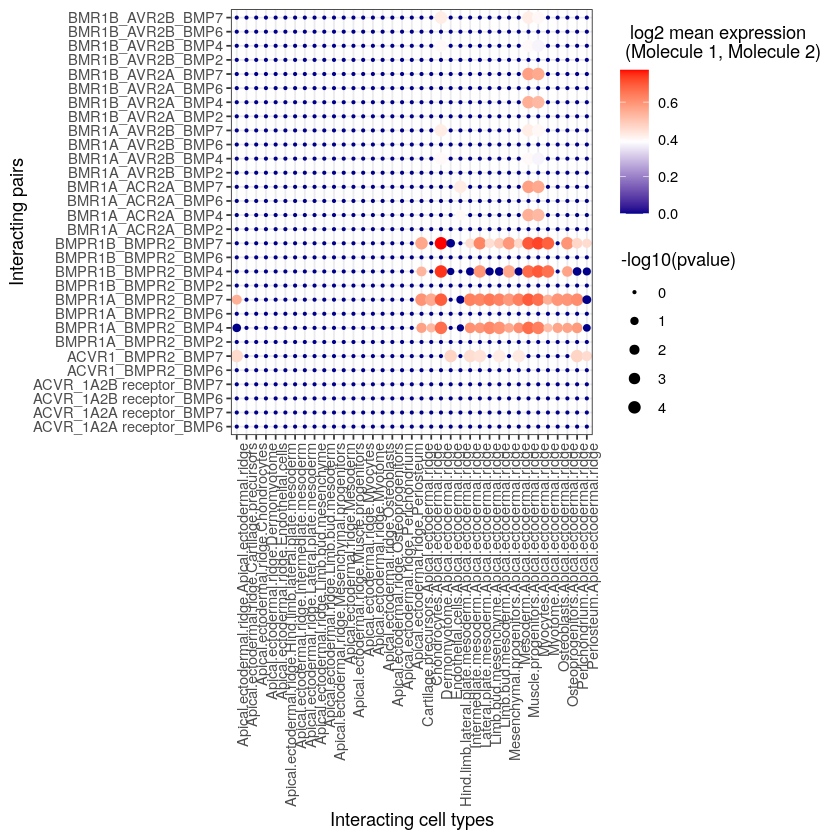

In [68]:
midpoint <- median(range(df.mean.pvalues$mean))

plot <- ggplot(df.mean.pvalues, aes(x = interactors, y = interacting_pair)) +
            geom_point(aes(size = pvalue, color = mean)) +
            scale_color_gradient2(low = "darkblue", mid = "white", high = "red", midpoint = midpoint) +
            scale_size(range = c(0.5, 2.85)) +
            theme_bw() + 
            theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
            xlab("Interacting cell types") + ylab("Interacting pairs")

plot <- plot + labs(color = "log2 mean expression \n (Molecule 1, Molecule 2)", size = "-log10(pvalue)")

plot <- plot + theme(legend.title.align = 0.5)

plot

In [69]:
ggsave("visualisation/AER.BMP.e12.5.filtered.dotplot.tiff", width = 11, height = 10)

In [70]:
df.mean.pvalues12 = df.mean.pvalues

## E13.5
### Mean expression values

In [71]:
sign.means.e13.5 <- read.delim(file = "out13.5/significant_means.txt", header = TRUE)

Remove unwanted rows and columns:

In [72]:
# rows
sign.means.e13.5 <- sign.means.e13.5[grep("BMP[2467]", x = sign.means.e13.5$interacting_pair),] 

to.discard <- grep("PTPRK|SMO|SLAMF1", sign.means.e13.5$interacting_pair)
sign.means.e13.5 <- sign.means.e13.5[-to.discard,]

In [73]:
#columns
sign.means.e13.5 <- sign.means.e13.5[,c(1:12, grep("Apical.ectodermal.ridge", x = colnames(sign.means.e13.5)))] 

to.discard <- grep("Branchial|Cardiomyocytes|Stroma|Vascular", colnames(sign.means.e13.5))
sign.means.e13.5 <- sign.means.e13.5[, -to.discard]

In [74]:
tail(colnames(sign.means.e13.5),1)

[1] "Periosteum.Apical.ectodermal.ridge"

In [75]:
df.mean <- sign.means.e13.5  %>% 
            gather(interactors, mean, "Apical.ectodermal.ridge.Apical.ectodermal.ridge":"Periosteum.Apical.ectodermal.ridge")

Set NA means to 0

In [76]:
df.mean$mean[is.na(df.mean$mean)] <- 0

### P-values for expression data

In [77]:
pvalues.e13.5 <- read.delim(file = "out13.5/pvalues.txt", header = TRUE)

Remove unwanted rows and columns:

In [78]:
# rows
pvalues.e13.5 <- pvalues.e13.5[grep("BMP[2467]", x = pvalues.e13.5$interacting_pair),]

to.discard <- grep("PTPRK|SMO|SLAMF1", pvalues.e13.5$interacting_pair)
pvalues.e13.5 <- pvalues.e13.5[-to.discard,]

In [79]:
# columns
pvalues.e13.5 <- pvalues.e13.5[,c(1:11, grep("Apical.ectodermal.ridge", x = colnames(pvalues.e13.5)))] 

to.discard <- grep("Branchial|Cardiomyocytes|Stroma|Vascular", colnames(pvalues.e13.5))
pvalues.e13.5 <- pvalues.e13.5[, -to.discard]

In [80]:
df.pvalues <- pvalues.e13.5  %>% 
            gather(interactors, pvalue, "Apical.ectodermal.ridge.Apical.ectodermal.ridge":"Periosteum.Apical.ectodermal.ridge")

Set NA pvalues to 1

In [81]:
df.pvalues$pvalue[is.na(df.pvalues$pvalue)] <- 1

Perform a log-transformation on the pvalues (pseudocount 0.0001).

In [82]:
df.pvalues$pvalue <- -log10(df.pvalues$pvalue + 0.0001)

### Couple means to their respective p-values

In [83]:
cols.to.join <- c(head(colnames(pvalues.e13.5), 7), "interactors")

In [84]:
df.mean.pvalues <- full_join(df.mean, df.pvalues, by = cols.to.join)

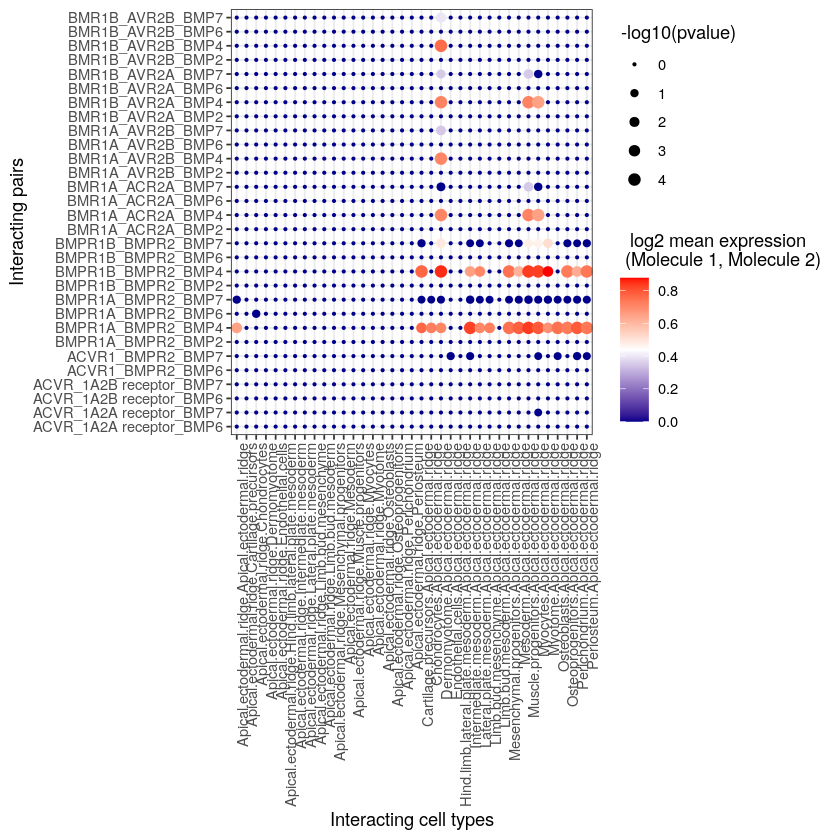

In [85]:
midpoint <- median(range(df.mean.pvalues$mean))

plot <- ggplot(df.mean.pvalues, aes(x = interactors, y = interacting_pair)) +
            geom_point(aes(size = pvalue, color = mean)) +
            scale_color_gradient2(low = "darkblue", mid = "white", high = "red", midpoint = midpoint) +
            scale_size(range = c(0.5, 2.85)) +
            theme_bw() + 
            theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
            xlab("Interacting cell types") + ylab("Interacting pairs")

plot <- plot + labs(color = "log2 mean expression \n (Molecule 1, Molecule 2)", size = "-log10(pvalue)")

plot <- plot + theme(legend.title.align = 0.5)

plot

In [86]:
ggsave("visualisation/AER.BMP.e13.5.filtered.dotplot.tiff", width = 11, height = 10)

In [87]:
df.mean.pvalues13 = df.mean.pvalues

# One plot to rule them all

In [88]:
df.mean.pvalues9$Timepoint <- "E9.5"
df.mean.pvalues10$Timepoint <- "E10.5"
df.mean.pvalues11$Timepoint <- "E11.5"
df.mean.pvalues12$Timepoint <- "E12.5"
df.mean.pvalues13$Timepoint <- "E13.5"

In [89]:
cols.to.join <- c(colnames(df.mean.pvalues9))

In [90]:
df.mean.pvalues <- full_join(df.mean.pvalues9, df.mean.pvalues10, by = cols.to.join)
df.mean.pvalues <- full_join(df.mean.pvalues, df.mean.pvalues11, by = cols.to.join)
df.mean.pvalues <- full_join(df.mean.pvalues, df.mean.pvalues12, by = cols.to.join)
df.mean.pvalues <- full_join(df.mean.pvalues, df.mean.pvalues13, by = cols.to.join)

In [91]:
df.mean.pvalues$Timepoint <- as.factor(df.mean.pvalues$Timepoint)
df.mean.pvalues$Timepoint <- relevel(df.mean.pvalues$Timepoint, ref = "E9.5")

In [95]:
# require(stringr)
df.mean.pvalues$interactors <- str_replace(df.mean.pvalues$interactors, 
                                           pattern = "Apical.ectodermal.ridge", 
                                           replacement = "AER")

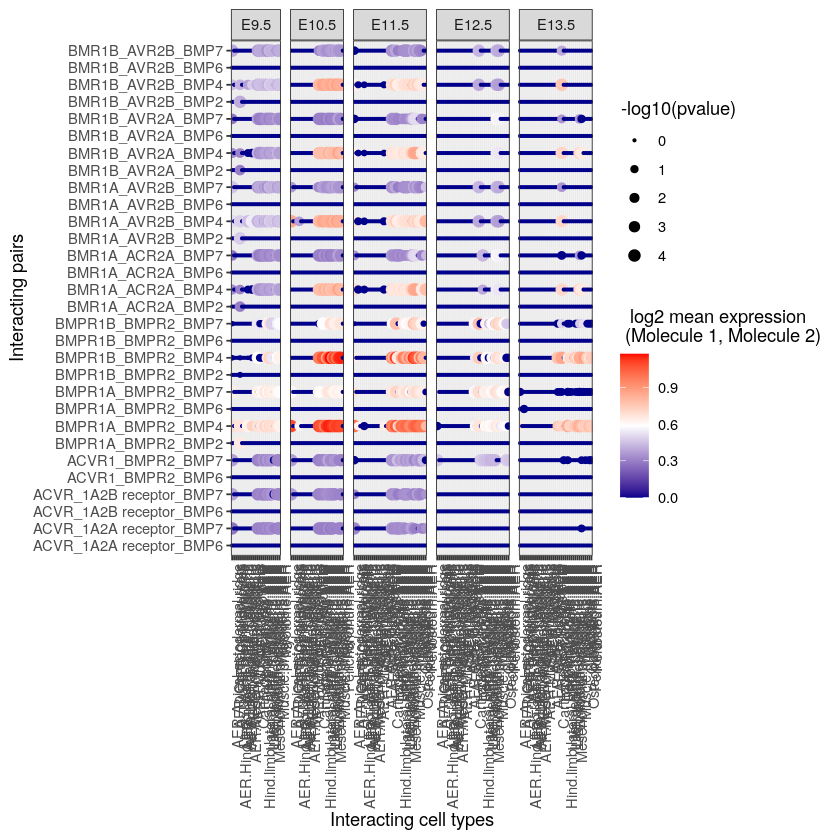

In [96]:
midpoint <- median(range(df.mean.pvalues$mean))

plot <- ggplot(df.mean.pvalues, aes(x = interactors, y = interacting_pair)) +
            geom_point(aes(size = pvalue, color = mean)) +
            scale_color_gradient2(low = "darkblue", mid = "white", high = "red", midpoint = midpoint) +
            scale_size(range = c(0.5, 2.85)) +
            theme_bw() + 
            theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
            xlab("Interacting cell types") + ylab("Interacting pairs")

plot <- plot + labs(color = "log2 mean expression \n (Molecule 1, Molecule 2)", size = "-log10(pvalue)")

plot <- plot + theme(legend.title.align = 0.5)

plot <- plot + facet_grid(~Timepoint, scale = "free", space = "free_x")

plot

In [97]:
ggsave("visualisation/AER.BMP.joined.filtered.dotplot.png", width = 20, height = 10)